In [1]:
%matplotlib ipympl
from ipywidgets import interact, interactive, ToggleButton, FloatSlider
import ipywidgets as widgets
from matplotlib import pyplot as plt
from wingstructure import data, aero

In [2]:
# create wing object
wing = data.Wing()

# add sections to wing
wing.add_section(data.Point(0.0, 0.0, 0.0), 1.0, 0.0)
wing.add_section(data.Point(0.05, 4.25, 0.0), 0.7, 0.0)
wing.add_section(data.Point(0.1, 7.75, 0.0), 0.35, 0.0)

# set fuselage with (=root of wing) to zero
wing.set_root_pos(0.0)

# define spoiler position
wing.set_spoiler(1.5, 2.9)

# define control-surfaces
wing.set_flap('flap', 1, 2.8,[0.7,0.7])
wing.set_flap('flap2', 4.25, 7, [0.7,0.8])

# display simple wing
plt.figure(figsize=(8,5))
wing.plot()

FigureCanvasNbAgg()

In [3]:
class liftplotter:
    def __init__(self):
        
        self.liftana = aero.LiftAnalysis(wing=wing)
        
        self.fig = plt.figure()
        
        self.ax = plt.gca()
        
        plt.ylabel('lokaler Auftriebsbeiwert $c_l$')
        plt.xlabel('Spannweitenposition y in m')
        
        plt.ylim(-1.7, 2.1)
        
        res = self._calc(0.0)
        plt.grid()
        
        self.line = self.ax.plot(self.liftana.calc_ys, res[1])[0]
        
        self.text = plt.text(8, -1.7, r'$\alpha = {}^\circ$'.format(res[0]),
                             horizontalalignment='right')
    
    def _calc(self, C_L, aileron_l=0.0, aileron_r=0.0, spoiler=False):
        
        flap = {'flap2': [aileron_l, aileron_r]}
    
        res = self.liftana.calculate(C_L, air_brake=spoiler, flap_deflections=flap)
        
        return res
    
    def plotdistri(self,C_L, spoiler=False, aileron_l=0.0, aileron_r=0.0):
        
        res = self._calc(C_L, spoiler, aileron_l, aileron_r)
        
        self.line.set_ydata(res[1])
        self.text.set_text(r'$\alpha = {:.2f}^\circ$'.format(res[0]))

In [5]:
lp = liftplotter()

def pltfun(C_L, aileron_l, aileron_r, spoiler):
    
    lp.plotdistri(C_L, aileron_l, aileron_r, spoiler)

lift_slider = FloatSlider(value=0.0, min=-1.0, max=1.5)
spoiler_button = ToggleButton(value=False, description='spoiler')
aileron_slider_l = FloatSlider(value=0.0, min=-8, max=9)
aileron_slider_r = FloatSlider(value=0.0, min=-8, max=9)
    
interact(pltfun, 
         C_L=lift_slider, 
         aileron_l=aileron_slider_l,
         aileron_r=aileron_slider_r,
         spoiler=spoiler_button);

/home/jonathan/Programmieren/wingstructure/wingstructure/aero/analysis.py:33: UserWarning: No airfoil database defined, using default airfoil.
  warn('No airfoil database defined, using default airfoil.')


FigureCanvasNbAgg()

interactive(children=(FloatSlider(value=0.0, description='C_L', max=1.5, min=-1.0), FloatSlider(value=0.0, des…

In [6]:
from wingstructure.structure import section

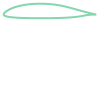

In [10]:
import numpy as np

coords = np.loadtxt('airfoils/ah93157.dat',skiprows=1)

secbase = section.SectionBase(coords)
secbase